# **Load Module**

In [393]:
import pandas as pd 
import numpy as np
import sklearn 
df = pd.read_csv('https://raw.githubusercontent.com/donatkukus/data/main/df31.csv')

In [394]:
sklearn.__version__

'1.0.2'

# **Drop Unusable Label**

In [395]:
# df = df[df.jenis_usaha != ['Transportasi','Toko Buah','Penggilingan','Alat Kecantikan','Koleksi','Alat kesehatan','Perseroan Komanditer','Jasa Isi Ulang Air Minum','Jasa Mengajar','Fotocopy']]


drop_label =  ['Transportasi','Toko Buah','Penggilingan','Alat Kecantikan','Koleksi','Alat kesehatan','Perseroan Komanditer','Jasa Isi Ulang Air Minum','Jasa Mengajar','Fotocopy']
for drop in drop_label:
  df = df[df.jenis_usaha != drop]

In [396]:
df['jenis_usaha'].value_counts()

Kuliner                   30
Toserba/Toko Kelontong    29
Perternakan               27
Elektronik                11
Dropshipper                8
Barang Digital             7
Pakaian                    7
Kosmetik                   4
Name: jenis_usaha, dtype: int64

In [397]:
df.head()

,Unnamed: 0,jenis_usaha,Modal,modal_minimum,modal_maximum,tingkat_persaingan,tingkat_persaingan_idx,jumlah_pegawai,pegawai_minimum,omset,...,sosial_media,sosial_media_idx,barang_toserba,toko_toserba,toko_toserba_idx,tipe_toko,tipe_toko_idx,usaha_lain,tipe_usaha_lain,tipe_usaha_lain_idx
1,1,Perternakan,10 - 25jt,10000000.0,25000000.0,Sedang,1,1 orang (Anda sendiri),1,10-50 Juta,...,no_info,0,no_info,no_info,0,no_info,0,no_info,no_info,0
2,2,Toserba/Toko Kelontong,1jt - 10 jt,1000000.0,10000000.0,Sedang,1,1 orang (Anda sendiri),1,< 10 Juta,...,no_info,0,Sembako,True,1,Ruko,1,no_info,no_info,0
3,3,Kuliner,1jt - 10 jt,1000000.0,10000000.0,Sedang,1,1 orang (Anda sendiri),1,< 10 Juta,...,no_info,0,no_info,no_info,0,no_info,0,no_info,no_info,0
4,4,Dropshipper,1jt - 10 jt,1000000.0,10000000.0,Rendah,0,1 orang (Anda sendiri),1,< 10 Juta,...,WA,1,no_info,no_info,0,no_info,0,no_info,no_info,0
5,5,Dropshipper,1jt - 10 jt,1000000.0,10000000.0,Tinggi,2,1 orang (Anda sendiri),1,< 10 Juta,...,IG,2,no_info,no_info,0,no_info,0,no_info,no_info,0


In [398]:
#Drop unusable columns
df = df.drop(columns=['Unnamed: 0','Modal','tingkat_persaingan','jumlah_pegawai','omset',
                      'target_pasar','lokasi','hewan_ternak','hewan_ternak_sub','lokasi_geografis',
                      'mengerti_hewan','luas_lahan','usaha_kuliner','tipe_usaha_kuliner','kemampuan_masak',
                      'barang_dropship','penyimpanan_barang','biaya_internet','sosial_media','barang_toserba',
                      'toko_toserba','tipe_toko','usaha_lain','tipe_usaha_lain'])

In [399]:
df

,jenis_usaha,modal_minimum,modal_maximum,tingkat_persaingan_idx,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi_idx,...,mengerti_hewan_idx,lahan_minimum,tipe_usaha_kuliner_idx,kemampuan_masak_idx,penyimpanan_barang_idx,internet_minimum,sosial_media_idx,toko_toserba_idx,tipe_toko_idx,tipe_usaha_lain_idx
1,Perternakan,10000000.0,25000000.0,1,1,25000000.0,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0
2,Toserba/Toko Kelontong,1000000.0,10000000.0,1,1,1000000.0,1,1,0,1,...,0,0.0,0,0,0,0,0,1,1,0
3,Kuliner,1000000.0,10000000.0,1,1,1000000.0,0,1,0,1,...,0,0.0,1,1,0,0,0,0,0,0
4,Dropshipper,1000000.0,10000000.0,0,1,1000000.0,1,0,0,0,...,0,0.0,0,0,1,100000,1,0,0,0
5,Dropshipper,1000000.0,10000000.0,2,1,1000000.0,1,1,0,0,...,0,0.0,0,0,1,300000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Perternakan,10000000.0,25000000.0,1,2,25000000.0,1,1,1,1,...,2,1000.0,0,0,0,0,0,0,0,0
129,Perternakan,10000000.0,25000000.0,1,2,25000000.0,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0
130,Perternakan,1000000.0,10000000.0,1,1,1000000.0,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0
131,Perternakan,10000000.0,25000000.0,1,1,1000000.0,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0


# **LABEL ENCODING**

In [400]:
from sklearn import preprocessing



#Encode 'jenis_usaha' class
encoder = preprocessing.LabelEncoder()
encoder.fit(df.jenis_usaha)
df['jenis_usaha'] = encoder.transform(df.jenis_usaha)

#Make a mapping of label encoder

classes = dict(zip(encoder.transform(encoder.classes_), encoder.classes_  ))

In [401]:
classes

{0: 'Barang Digital',
 1: 'Dropshipper',
 2: 'Elektronik',
 3: 'Kosmetik',
 4: 'Kuliner',
 5: 'Pakaian',
 6: 'Perternakan',
 7: 'Toserba/Toko Kelontong'}

In [402]:
label = df['jenis_usaha']
label = label.to_frame(name = 'jenis_usaha')


In [403]:
#Drop encoded labels from the main dataframe
df = df.drop('jenis_usaha', axis = 1)



In [404]:
df.head()

,modal_minimum,modal_maximum,tingkat_persaingan_idx,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi_idx,hewan_ternak_idx,...,mengerti_hewan_idx,lahan_minimum,tipe_usaha_kuliner_idx,kemampuan_masak_idx,penyimpanan_barang_idx,internet_minimum,sosial_media_idx,toko_toserba_idx,tipe_toko_idx,tipe_usaha_lain_idx
1,10000000.0,25000000.0,1,1,25000000.0,1,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0
2,1000000.0,10000000.0,1,1,1000000.0,1,1,0,1,0,...,0,0.0,0,0,0,0,0,1,1,0
3,1000000.0,10000000.0,1,1,1000000.0,0,1,0,1,0,...,0,0.0,1,1,0,0,0,0,0,0
4,1000000.0,10000000.0,0,1,1000000.0,1,0,0,0,0,...,0,0.0,0,0,1,100000,1,0,0,0
5,1000000.0,10000000.0,2,1,1000000.0,1,1,0,0,0,...,0,0.0,0,0,1,300000,2,0,0,0


# **Normalize Large Value**

In [405]:
def normalize(df):
  df = (df-df.min())/(df.max()-df.min())
  return df

In [406]:
df['modal_maximum'] = normalize(df['modal_maximum'])

In [407]:
df['modal_minimum'] = normalize(df['modal_minimum'])

In [408]:
df['omset_minimum'] = normalize(df['omset_minimum'])

In [409]:
df.head()

,modal_minimum,modal_maximum,tingkat_persaingan_idx,pegawai_minimum,omset_minimum,tp_b,tp_m,tp_a,lokasi_idx,hewan_ternak_idx,...,mengerti_hewan_idx,lahan_minimum,tipe_usaha_kuliner_idx,kemampuan_masak_idx,penyimpanan_barang_idx,internet_minimum,sosial_media_idx,toko_toserba_idx,tipe_toko_idx,tipe_usaha_lain_idx
1,0.387755,0.242424,1,1,0.489796,1,1,1,1,1,...,1,1000.0,0,0,0,0,0,0,0,0
2,0.020408,0.090909,1,1,0.000000,1,1,0,1,0,...,0,0.0,0,0,0,0,0,1,1,0
3,0.020408,0.090909,1,1,0.000000,0,1,0,1,0,...,0,0.0,1,1,0,0,0,0,0,0
4,0.020408,0.090909,0,1,0.000000,1,0,0,0,0,...,0,0.0,0,0,1,100000,1,0,0,0
5,0.020408,0.090909,2,1,0.000000,1,1,0,0,0,...,0,0.0,0,0,1,300000,2,0,0,0


# **Split Train and Test data**

In [410]:
#Split train - test
from sklearn.model_selection import train_test_split
data = df.to_numpy()
label = label.to_numpy()



data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.2, random_state = 42)


In [411]:
print(data_train.shape)
print(data_test.shape)

(98, 21)
(25, 21)


In [412]:
label_train = label_train.flatten()
label_test = label_test.flatten()
print(label_train.shape)
print(label_test.shape)

(98,)
(25,)


# **KNN**

In [413]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

In [414]:
model = KNeighborsClassifier(n_neighbors=2)


In [415]:
model.fit(data_train, label_train)

KNeighborsClassifier(n_neighbors=2)

In [416]:
predict = model.predict(data_test)

In [417]:
print("Prediction : ",predict)
print("Actual label : ",label_test)

Prediction :  [7 7 7 4 1 7 4 7 0 2 7 3 1 4 4 4 0 2 6 6 0 7 0 6 6]
Actual label :  [7 7 7 4 1 7 4 7 7 2 7 3 1 4 4 4 0 2 6 6 5 7 5 6 6]


In [418]:
from sklearn import metrics

print("accuracy : ", metrics.accuracy_score(predict, label_test))

accuracy :  0.88


# Visualize KNN model through every K possible 

In [419]:
# K will be in between 1 to 8 since we have 8 class
K = range(1,9)


accuracies_list = []

for k in K:
  model2 = KNeighborsClassifier(n_neighbors=k)
  model2.fit(data_train, label_train)
  predictions = model2.predict(data_test)
  accuracies_list.append(metrics.accuracy_score(predictions, label_test))

Text(0, 0.5, 'Accuracy')

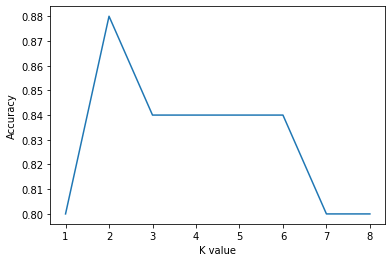

In [420]:
plt.plot(K,accuracies_list)
plt.xlabel('K value')
plt.ylabel('Accuracy')

# Prediction

In [421]:
#Prediction for peternakan
predict = model.predict(df.iloc[[0]].to_numpy())
classes[predict[0]]

'Perternakan'

In [422]:
#Prediction for kuliner
predict = model.predict(df.iloc[[2]].to_numpy())
classes[predict[0]]

'Kuliner'

In [423]:
#Prediction for toserba
predict = model.predict(df.iloc[[1]].to_numpy())
classes[predict[0]]

'Toserba/Toko Kelontong'

# **Saving KNN model**

In [424]:
import joblib

joblib.dump(model, 'ModelKnn.pkl')

['ModelKnn.pkl']

In [425]:
model_loaded = joblib.load('ModelKnn.pkl')


classes[model_loaded.predict(df.iloc[[1]].to_numpy())[0]]

'Toserba/Toko Kelontong'